In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from collections import defaultdict

In [2]:
from src import cm_metrics
reload(cm_metrics)
from src import calc_cocoa as cc
reload(cc)

fix_data = cc.load_all_data('src/files_list_fix.txt')
fix_style2chat_dict = cc.get_style2chat(fix_data)
# bot_data = cc.load_all_data('src/files_list_bot.txt')
# all_cm_data = cc.get_general_cm_metrics(fix_data)
# bot_cm_data = cc.get_general_cm_metrics(bot_data)

read all qual tsvs
read all chat jsons
read all lid tsvs


all tok 24150
WITH SELECT
bot strat	# dialogues	% success	% dial CM from user	avg utts	avg tokens	% CM utt	avg RT
average  	487	0.63	0.74	8.09	6.13	0.41	25.65
all      	487	0.63	0.74	8.09	6.13	0.41	25.65

********************

	rt_numtok	nan	nan
y=0.119536x+(3.066277)


src/calc_cocoa.py:337: RankWarning: Polyfit may be poorly conditioned
  plt.plot(rt_list, p(rt_list), "r--")


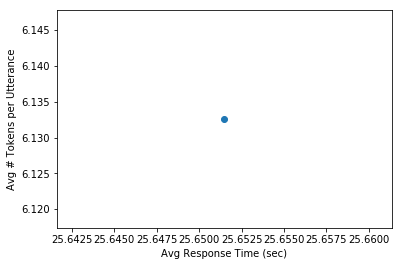


********************



In [11]:
reload(cc)
fix_data_onestyle = {}
fix_data_onestyle['all'] = all_cm_data
cc.viz_general(fix_data_onestyle)

In [122]:
print fix_style2chat_dict.keys()

[u'sp_lex_soc', u'sp2en', u'sp2en_soc', u'random', u'en_mono', u'sp_lex', u'en2sp_soc', u'sp_mono', u'en_lex_soc', u'en_lex', u'en2sp']


In [22]:
# FIX (don't need to calc AUTO now)
bot_style_data = {}
for style, chat_list in fix_style2chat_dict.iteritems():
#     print '*'*10
#     print style
#     print '*'*10a
    bot_style_data[style] = cc.get_general_cm_metrics(bot_data, param_chat_list=chat_list)
print 'DONE collecting CM metrics into bot_data'

DONE collecting CM metrics into bot_data


all tok 53529
WITH SELECT
bot strat	# dialogues	% success	% dial CM from user	avg utts	avg tokens	% CM utt	avg RT
average  	558	0.67	1.00	9.69	9.90	0.85	26.46
en2sp    	63	0.78	1.00	9.76	10.46	0.85	27.45
en2sp_soc	56	0.70	1.00	8.98	11.16	0.86	25.03
en_lex   	61	0.64	1.00	9.67	9.28	0.83	30.61
en_lex_soc	51	0.69	1.00	10.45	10.49	0.87	25.41
random   	72	0.69	1.00	8.94	9.63	0.84	23.27
sp2en    	67	0.79	1.00	8.96	8.79	0.83	30.65
sp2en_soc	63	0.49	1.00	11.10	9.81	0.85	26.71
sp_lex   	77	0.52	1.00	10.74	9.66	0.84	26.87
sp_lex_soc	48	0.79	1.00	8.21	10.41	0.83	22.16

********************

	rt_numtok	-0.6218	0.0738
y=-0.155347x+(14.074612)


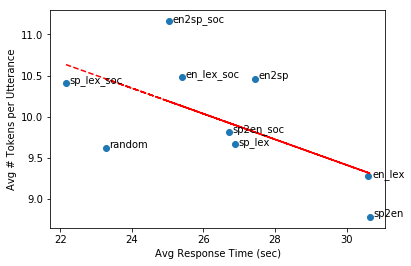


********************



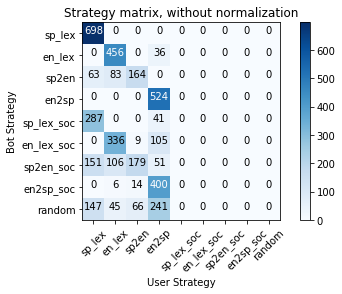

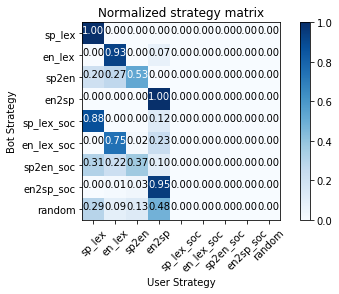

In [23]:
reload(cc)
cc.viz_general(bot_style_data)
cc.viz_cm_style(bot_style_data)

# Subset Groups
* Language proficiency
    * country (Spanish-speaking vs Not)
    * Spanish score
    * self-reported ability measures
* monolingual vs bilingual utterances
* remove 1-word response ppl only

## Get first-time workers
For more "raw" chats? So they haven't gamed the system yet

In [4]:
from src import subset_users as su
reload(su)

first_data = su.read_qual_file('cocoa/eval/all_qual_firsttime_0926.tsv')
spa_country_workerids, region_dict_full = su.split_country(first_data)
spa_country_chatids = su.get_chats_from_workers(spa_country_workerids, fix_data)
print len(first_data)
print len(spa_country_workerids), spa_country_workerids[:3], '...'
print len(spa_country_chatids)

322
197 ['A217M5CHYXKABY', '44140179', '35154350'] ...
418


In [9]:
reload(su)
spa_abil_high, spa_abil_low = su.split_lang_ability(first_data, lang='spa', score_thresh=4)
spa_high_chatids = su.get_chats_from_workers(spa_abil_high, fix_data)
spa_low_chatids = su.get_chats_from_workers(spa_abil_low, fix_data)
print 'SPANISH'
print 'high', len(spa_high_chatids)
print 'low', len(spa_low_chatids)

eng_abil_high, eng_abil_low = su.split_lang_ability(first_data, lang='eng', score_thresh=4)
eng_high_chatids = su.get_chats_from_workers(eng_abil_high, fix_data)
eng_low_chatids = su.get_chats_from_workers(eng_abil_low, fix_data)
print '\nENGLISH'
print 'high', len(eng_high_chatids)
print 'low', len(eng_low_chatids)

eng_dom = [i for i in eng_abil_high if i in spa_abil_low]
spa_dom = [i for i in spa_abil_high if i in eng_abil_low]
both_dom = [i for i in spa_abil_high if i in eng_abil_high]
eng_dom_chatids = su.get_chats_from_workers(eng_dom, fix_data)
spa_dom_chatids = su.get_chats_from_workers(spa_dom, fix_data)
both_dom_chatids = su.get_chats_from_workers(both_dom, fix_data)
print '\neng_dom: {} chatids, {} users'.format(len(eng_dom_chatids), len(eng_dom))
print 'spa_dom: {} chatids, {} users'.format(len(spa_dom_chatids), len(spa_dom))
print 'both_dom: {} chatids, {} users'.format(len(both_dom_chatids), len(both_dom))

SPANISH
high 488
low 161

ENGLISH
high 581
low 68

eng_dom: 143 chatids, 77 users
spa_dom: 50 chatids, 29 users
both_dom: 438 chatids, 207 users


DONE collecting CM metrics into all_data


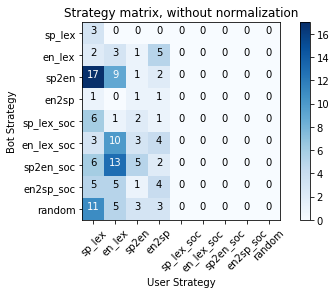

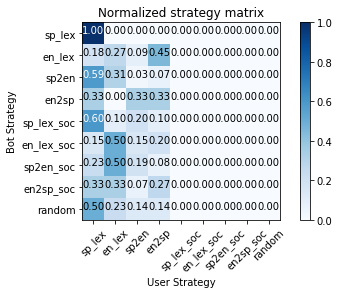

DONE collecting CM metrics into all_data


src/calc_cocoa.py:424: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/Users/eahn/.pyenv/versions/2.7.10/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


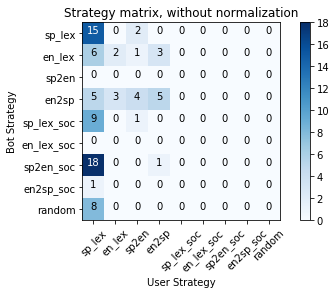

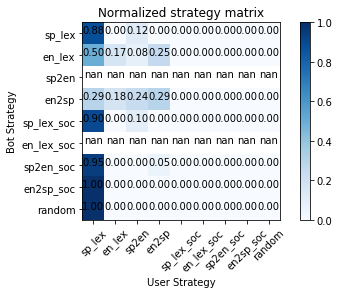

trimming end ['no', 'i', 'do', 'nt', 'have', 'a', 'friend', 'quien', 'trabaja', 'en', '', 'el', 'banco', '']
DONE collecting CM metrics into all_data


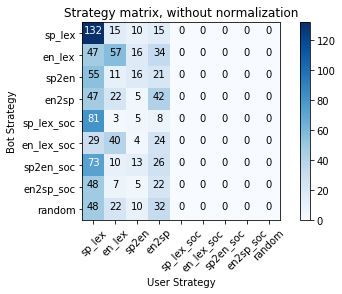

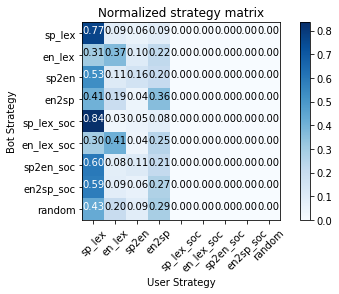

In [11]:
for chatids in [eng_dom_chatids, spa_dom_chatids, both_dom_chatids]:
    ability_styles = {}
    for style, chat_list in fix_style2chat_dict.iteritems():
        new_chat_list = [chatid for chatid in chat_list if chatid in chatids]
        ability_styles[style] = cc.get_general_cm_metrics(fix_data, param_chat_list=new_chat_list)
    print 'DONE collecting CM metrics into all_data'
    cc.viz_cm_style(ability_styles)

In [85]:
# among low quiz scores, 29/32 workers are not in spa_country_workerids
reload(su)
spa_score_high, spa_score_low = su.split_span_quiz(first_data, 'cocoa/turk/0926_amt_workers.csv', 'cocoa/turk/fig8_all_json_0924.txt', score_thresh=2)
spa_high_score_chatids = su.get_chats_from_workers(spa_score_high, fix_data)
spa_low_score_chatids = su.get_chats_from_workers(spa_score_low, fix_data)  # len = 40
print 'SPANISH'
print 'high'
print len(spa_score_high), spa_score_high[:3], '...'
print len(spa_high_score_chatids)

print 'low'
print len(spa_score_low), spa_score_low[:3], '...'
print len(spa_low_score_chatids)

SPANISH
high
326 ['44260973', '44807855', 'A2GVKES58KMHNJ'] ...
596
low
39 ['44713357', '32245411', 'A15U7DSTCY2Q9Q'] ...
52


In [90]:
print len([workerid for workerid in spa_abil_low if workerid not in spa_country_workerids])
print len(spa_abil_low)

56
69


In [28]:
# use this cell to get counts of each country
print region_dict_full['caribbean']

defaultdict(<type 'list'>, {'dominican republic': ['A2V107RENHSQ0Z', 'A22Y2PTD9TFWAR', '43839731', 'A2P4J6SJ0KLF2G', 'A3CK3G44U565F5', 'A35065ZCC1QJ7M', '43941154', 'A2YH6YQIHS4GLK'], 'cuba': ['A2MM1BLJGIP830', 'A290EFC6RD9QJR', '44360038'], 'puerto rico': ['A3V1KYYC1HCJJG', '43968491', '43968554', 'A269B50AB729TP', 'A3DGMV7HQ51C20', '44232971', 'AYOHUGWIBJ6G6', 'AQ277F26ZFB1K', 'A1A6P3E6P6ZHLU', 'A2YJ0H0QAAQC8N', 'A25NI7DEN0IDCI']})


In [84]:
# does M/I affect Success?
# does ENTRAINMENT affect Success?
reload(cc)
print 'FIX LID (partial)'
cc.pearsons_cm_success(fix_data, cm_data=all_cm_data, filter_chatlist=fix_style2chat_dict['en_mono'])

FIX LID (partial)
NUM CHATS USED: 54

N07_TECH
	entrain	nan	1.0000
	social	nan	1.0000
	m-idx	0.0621	0.6555
	i-idx	0.1093	0.4314
N01_I_UNDERSTAND
	entrain	nan	1.0000
	social	nan	1.0000
	m-idx	0.2229	0.1052
	i-idx	0.3760	0.0051
N04_UNDERSTAND_ME
	entrain	nan	1.0000
	social	nan	1.0000
	m-idx	-0.1139	0.4121
	i-idx	0.1011	0.4670
N03_HUMAN
	entrain	nan	1.0000
	social	nan	1.0000
	m-idx	-0.2326	0.0905
	i-idx	-0.1541	0.2659
N05_CHAT
	entrain	nan	1.0000
	social	nan	1.0000
	m-idx	0.2563	0.0614
	i-idx	0.2854	0.0365
N06_TEXTS
	entrain	nan	1.0000
	social	nan	1.0000
	m-idx	-0.0333	0.8108
	i-idx	0.1827	0.1861
N02_COOPERATIVE
	entrain	nan	1.0000
	social	nan	1.0000
	m-idx	-0.1110	0.4243
	i-idx	0.0576	0.6790
BIN_SUCCESS
	entrain	nan	1.0000
	social	nan	1.0000
	m-idx	0.0759	0.5856
	i-idx	0.2190	0.1116
NUM_TURN
	entrain	nan	1.0000
	social	nan	1.0000
	m-idx	0.1547	0.2642
	i-idx	-0.0587	0.6734


In [108]:
print '[first-timers]'
cc.pearsons_cm_success(fix_data, cm_data=all_cm_data, filter_chatlist=first_chatids)

[first-timers]
NUM CHATS USED: 289

N07_TECH
	entrain	0.0044	0.9405
	social	0.0261	0.6589
	m-idx	0.0479	0.4173
	i-idx	0.0003	0.9954
N01_I_UNDERSTAND
	entrain	0.0472	0.4243
	social	0.0038	0.9485
	m-idx	0.1851	0.0016
	i-idx	0.1553	0.0082
N04_UNDERSTAND_ME
	entrain	-0.0540	0.3608
	social	0.0687	0.2445
	m-idx	0.0653	0.2687
	i-idx	0.0315	0.5942
N03_HUMAN
	entrain	-0.0085	0.8851
	social	0.0493	0.4038
	m-idx	0.0336	0.5698
	i-idx	-0.0043	0.9417
N05_CHAT
	entrain	-0.0404	0.4935
	social	0.0031	0.9588
	m-idx	0.1163	0.0483
	i-idx	0.0785	0.1834
N06_TEXTS
	entrain	-0.0160	0.7869
	social	0.0821	0.1639
	m-idx	0.0421	0.4759
	i-idx	0.0385	0.5142
N02_COOPERATIVE
	entrain	0.0192	0.7447
	social	0.0051	0.9311
	m-idx	0.0646	0.2738
	i-idx	0.0341	0.5640
BIN_SUCCESS
	entrain	-0.0521	0.3777
	social	-0.0724	0.2199
	m-idx	-0.0757	0.1995
	i-idx	-0.0297	0.6153
NUM_TURN
	entrain	0.0945	0.1089
	social	0.0542	0.3589
	m-idx	0.1717	0.0034
	i-idx	0.0797	0.1764


In [10]:
print first_chatids[:5]
print spa_country_workerids[:5]

['C_5a68ce8c6aa845cc8e878b80e516daef', 'C_7345bede92b7400c97b0cf3696a0d05a', 'C_d31c302322f14631935700664e9d0817', 'C_a11b3e5dfbdb49969dc61374ce97ff2c', 'C_835ad77952a74dc2b7284954170ad07e']
['A217M5CHYXKABY', '44140179', 'A1S8POKPUCKLEN', '43872127', 'A33SG6E90V97U5']


In [109]:
print 'ability testing'
cc.pearsons_cm_success(fix_data, cm_data=all_cm_data, filter_chatlist=spa_low_chatids)

ability testing
NUM CHATS USED: 139

N07_TECH
	entrain	0.0068	0.9362
	social	0.0681	0.4255
	m-idx	0.0603	0.4806
	i-idx	0.0188	0.8265
N01_I_UNDERSTAND
	entrain	0.1457	0.0870
	social	0.0886	0.2997
	m-idx	0.2605	0.0020
	i-idx	0.1996	0.0185
N04_UNDERSTAND_ME
	entrain	0.0405	0.6361
	social	0.0080	0.9253
	m-idx	-0.0373	0.6632
	i-idx	-0.0961	0.2602
N03_HUMAN
	entrain	0.0640	0.4539
	social	-0.0588	0.4914
	m-idx	0.0563	0.5104
	i-idx	-0.0499	0.5594
N05_CHAT
	entrain	0.0853	0.3181
	social	-0.0350	0.6823
	m-idx	-0.0942	0.2700
	i-idx	-0.1185	0.1647
N06_TEXTS
	entrain	0.1432	0.0926
	social	-0.0725	0.3961
	m-idx	-0.0730	0.3933
	i-idx	-0.0848	0.3208
N02_COOPERATIVE
	entrain	0.0323	0.7054
	social	-0.0610	0.4759
	m-idx	0.0118	0.8904
	i-idx	-0.0318	0.7103
BIN_SUCCESS
	entrain	0.0204	0.8114
	social	-0.1324	0.1204
	m-idx	-0.0730	0.3929
	i-idx	-0.0643	0.4520
NUM_TURN
	entrain	-0.0254	0.7669
	social	0.1838	0.0303
	m-idx	0.2734	0.0011
	i-idx	0.1962	0.0206


DONE collecting CM metrics into all_data
all tok 1488
all dial 36
WITH SELECT
bot strat	# dialogues	% success	% dial CM from user	avg utts	avg tokens	% CM utt	avg RT	m	i
average  	3.27	0.58	0.61	8.50	4.86	0.25	24.68	0.61	0.19
sp_lex   	1	1.00	1.00	1.00	8.00	1.00	30.30	0.60	0.43
sp_lex_soc	5	0.60	0.80	13.40	4.97	0.39	13.88	0.51	0.21
en_lex   	3	1.00	0.67	5.67	3.94	0.24	18.46	0.98	0.14
en_lex_soc	4	0.50	0.75	9.75	5.82	0.26	22.32	0.95	0.24
sp2en    	2	0.00	1.00	10.50	3.95	0.48	38.46	0.69	0.26
sp2en_soc	3	0.00	0.33	11.33	5.35	0.18	31.54	0.36	0.16
en2sp    	3	1.00	0.67	4.00	5.83	0.25	29.64	0.98	0.21
en2sp_soc	1	1.00	0.00	3.00	1.00	0.00	23.63	0.00	0.00
sp_mono  	2	0.50	0.50	9.50	2.95	0.11	20.23	0.18	0.20
en_mono  	7	0.57	0.43	7.86	6.29	0.13	26.79	0.51	0.09
random   	5	0.60	0.60	7.60	2.97	0.16	16.21	0.94	0.14

********************

	rt_numtok	0.3290	0.3232
y=0.085593x+(2.531698)


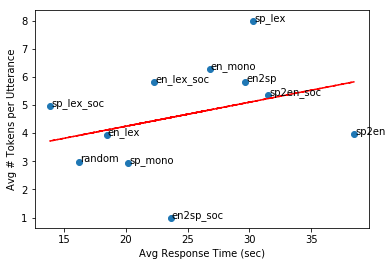


********************



In [106]:
ability_styles = {}
for style, chat_list in fix_style2chat_dict.iteritems():
    new_chat_list = [chatid for chatid in chat_list if chatid in spa_low_score_chatids]
    ability_styles[style] = cc.get_general_cm_metrics(fix_data, param_chat_list=new_chat_list)
print 'DONE collecting CM metrics into all_data'
cc.viz_general(ability_styles)

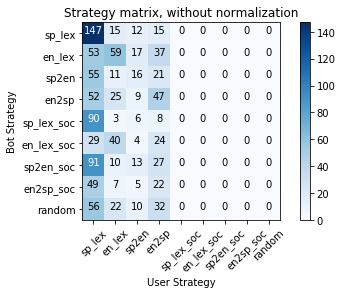

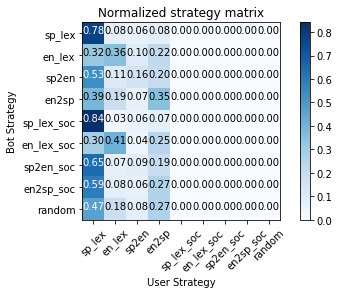

In [68]:
cc.viz_cm_style(ability_styles)

In [91]:
spa_country_styles = {}
for style, chat_list in fix_style2chat_dict.iteritems():
    new_chat_list = [chatid for chatid in chat_list if chatid in spa_country_chatids]
    spa_country_styles[style] = cc.get_general_cm_metrics(fix_data, param_chat_list=new_chat_list)
# cc.get_general_cm_metrics(style2chat_dict['en_lex'], all_data)
# cc.get_general_cm_metrics(style2chat_dict['en_lex_soc'], all_data)
print 'DONE collecting CM metrics into all_data'

trimming end ['no', 'i', 'do', 'nt', 'have', 'a', 'friend', 'quien', 'trabaja', 'en', '', 'el', 'banco', '']
DONE collecting CM metrics into all_data


all tok 19703
WITH SELECT
bot strat	# dialogues	% success	% dial CM from user	avg utts	avg tokens	% CM utt	avg RT	m	i
average  	33.45	0.62	0.76	8.24	6.50	0.42	25.47	0.68	0.24
sp_lex   	46	0.43	0.80	9.22	6.35	0.44	25.11	0.46	0.25
sp_lex_soc	30	0.77	0.77	6.33	6.44	0.49	21.88	0.47	0.27
en_lex   	41	0.59	0.83	7.63	7.41	0.58	28.10	0.90	0.31
en_lex_soc	27	0.70	0.74	8.07	6.46	0.40	23.94	0.90	0.27
sp2en    	37	0.78	0.76	7.38	6.80	0.40	27.50	0.82	0.23
sp2en_soc	35	0.43	0.77	9.83	6.42	0.42	27.50	0.63	0.27
en2sp    	37	0.73	0.81	8.84	6.58	0.46	23.93	0.89	0.27
en2sp_soc	30	0.57	0.87	8.33	6.57	0.40	24.58	0.62	0.26
sp_mono  	22	0.77	0.50	7.14	6.28	0.23	27.96	0.17	0.11
en_mono  	28	0.64	0.57	6.89	6.78	0.25	27.64	0.82	0.16
random   	35	0.60	0.77	9.77	5.57	0.41	21.98	0.81	0.23

********************

	rt_numtok	0.5960	0.0530
y=0.110773x+(3.693782)


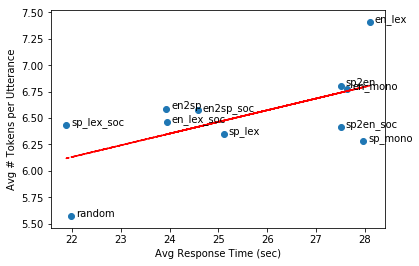


********************



In [92]:
reload(cc)
cc.viz_general(spa_country_styles)

In [82]:
# FIX (don't need to calc AUTO now)
reload(cc)
fix_style_data = {}
for style, chat_list in fix_style2chat_dict.iteritems():
    fix_style_data[style] = cc.get_general_cm_metrics(fix_data, param_chat_list=chat_list)
print 'DONE collecting CM metrics into fix_style_data'

trimming end ['no', 'i', 'do', 'nt', 'have', 'a', 'friend', 'quien', 'trabaja', 'en', '', 'el', 'banco', '']
DONE collecting CM metrics into fix_style_data


all tok 28452
all dial 587
WITH SELECT
bot strat	# dialogues	% success	% dial CM from user	avg utts	avg tokens	% CM utt	avg RT	m	i
average  	53.36	0.64	0.70	7.87	6.16	0.39	25.85	0.74	0.23
sp_lex   	70	0.47	0.74	8.44	6.33	0.42	27.25	0.51	0.23
sp_lex_soc	44	0.77	0.80	7.41	5.73	0.44	20.84	0.57	0.26
en_lex   	58	0.62	0.74	7.19	6.93	0.52	28.58	0.93	0.26
en_lex_soc	44	0.64	0.75	8.64	6.03	0.37	25.80	0.99	0.26
sp2en    	54	0.74	0.76	7.46	6.40	0.39	28.74	0.88	0.24
sp2en_soc	56	0.45	0.75	9.71	6.07	0.40	26.80	0.71	0.26
en2sp    	55	0.76	0.71	7.89	6.25	0.40	25.25	0.91	0.23
en2sp_soc	47	0.64	0.72	7.68	6.09	0.37	24.80	0.70	0.23
sp_mono  	46	0.72	0.57	7.20	6.13	0.26	25.98	0.37	0.16
en_mono  	54	0.69	0.54	6.44	6.53	0.25	28.80	0.74	0.16
random   	59	0.64	0.66	8.17	5.32	0.39	21.49	0.86	0.22

********************

	rt_numtok	0.8748	0.0004
y=0.135449x+(2.664301)


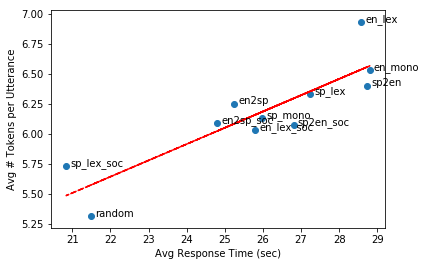


********************



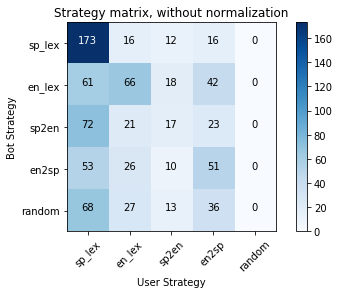

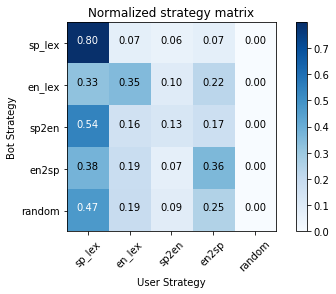

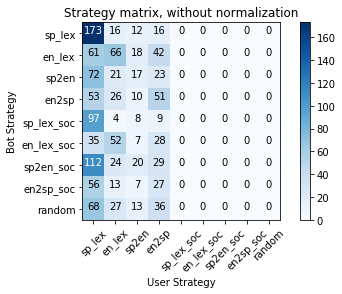

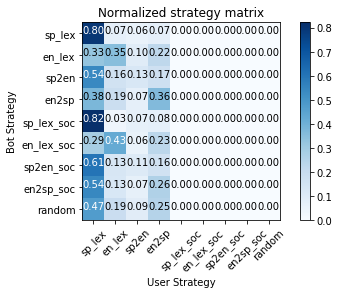

In [107]:
reload(cc)
cc.viz_general(fix_style_data)
cc.viz_cm_style(fix_style_data, is_social=0)
cc.viz_cm_style(fix_style_data, is_social=2)

In [31]:
# FIRST
reload(cc)
first_style_data = {}
for style, chat_list in fix_style2chat_dict.iteritems():
    new_chat_list = [chatid for chatid in chat_list if chatid in first_data]

#     print '*'*10
#     print style
#     print '*'*10a
    first_style_data[style] = cc.get_general_cm_metrics(fix_data, param_chat_list=new_chat_list)
# cc.get_general_cm_metrics(style2chat_dict['en_lex'], all_data)
# cc.get_general_cm_metrics(style2chat_dict['en_lex_soc'], all_data)
print 'DONE collecting CM metrics into first_style_data'

DONE collecting CM metrics into first_style_data


all tok 11018
WITH SELECT
bot strat	# dialogues	% success	% dial CM from user	avg utts	avg tokens	% CM utt	avg RT	m	i
average  	235	0.60	0.70	7.81	6.00	0.35	27.51	0.70	0.21
en2sp    	31	0.71	0.65	7.26	6.56	0.32	30.19	0.93	0.19
en2sp_soc	21	0.57	0.71	6.62	6.47	0.35	27.98	0.76	0.21
en_lex   	31	0.61	0.65	6.52	6.16	0.43	30.80	0.89	0.22
en_lex_soc	23	0.61	0.65	7.35	6.99	0.38	32.93	1.00	0.21
random   	14	0.50	0.86	9.79	4.52	0.34	21.24	0.48	0.22
sp2en    	31	0.74	0.77	7.13	5.83	0.37	28.21	0.75	0.23
sp2en_soc	27	0.41	0.67	9.74	5.56	0.33	28.88	0.52	0.22
sp_lex   	37	0.51	0.73	8.59	6.33	0.37	26.78	0.47	0.20
sp_lex_soc	20	0.70	0.65	8.10	5.16	0.28	20.60	0.54	0.19

********************

	rt_numtok	0.8508	0.0036
y=0.158170x+(1.600658)


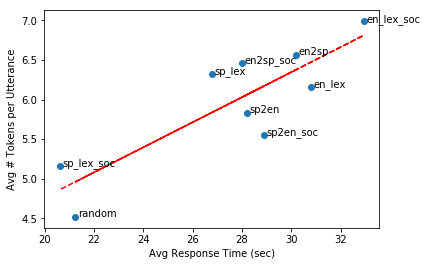


********************



In [32]:
reload(cc)
cc.viz_general(first_style_data)

In [ ]:
cc.viz_cm_style(fix_style_data, is_social=2)

# Examine MTurk vs Figure 8

In [ ]:
# create dict where key='mturk'/'fig8'/'none', value is chat_list

platform2chat = defaultdict(list)
ctr = 0
for chat_id, chat_dict in orig_data.iteritems():
    try:
        worker_id = chat_dict['worker_id']
        if worker_id.startswith('A'):
            platform = 'mturk'
        elif worker_id == '[none]':
            platform = 'none'
        else:
            platform = 'fig8'
    except:
        ctr += 1
        continue
        
    platform2chat[platform].append(chat_id)
    
print '[non-survey]:', ctr
for platform, chat_list in platform2chat.iteritems():
    print '{}\t{}'.format(platform, len(chat_list))

In [ ]:
# compare visualizations of styles between MTURK & FIG8
# intersect platform2chat and style2chat chat_id lists

for platform, plat_chat_list in platform2chat.iteritems():
    if platform == 'none':
        continue
        
    print '*'*10
    print platform
    print '*'*10
    plat_data = {}
    for style, style_chat_list in style2chat_dict.iteritems():
#         print '*'*10
#         print style
#         print '*'*10
        chat_list = [chat_id for chat_id in plat_chat_list if chat_id in style_chat_list]
        if not chat_list:
            print 'OH NO'
        plat_data[style] = cc.get_general_cm_metrics(chat_list, orig_data)
        
    cc.viz_general(plat_data)
    cc.viz_cm_style(plat_data)

# Examine across Task Success

In [127]:
# create dict where key=0/1, value is chat_list

success2chat = defaultdict(list)
ctr = 0
for chat_id, chat_dict in fix_data.iteritems():
    try:
        outcome = int(chat_dict['outcome'])
    except:
        ctr += 1
        continue
        
    success2chat[outcome].append(chat_id)
    
print '[neither]:', ctr
for outcome, chat_list in success2chat.iteritems():
    print '{}\t{}'.format(outcome, len(chat_list))

[neither]: 47
0	184
1	374


**********
0
**********
WITH SELECT
bot strat	# dialogues	% dial CM from user	avg utts	avg tokens	% CM utt	avg RT
average  	181	0.81	11.29	6.27	0.42	30.13
en2sp    	13	0.77	11.08	6.22	0.38	30.85
en2sp_soc	17	0.82	11.18	6.36	0.39	28.87
en_lex   	22	0.91	10.36	7.59	0.62	30.70
en_lex_soc	16	0.81	12.56	6.12	0.32	27.72
random   	21	0.86	12.00	5.35	0.40	26.98
sp2en    	14	0.79	9.71	6.65	0.46	36.32
sp2en_soc	31	0.81	12.26	5.97	0.41	27.75
sp_lex   	37	0.73	10.73	6.28	0.38	29.54
sp_lex_soc	10	0.80	11.50	6.38	0.44	32.45

********************

	rt_numtok	0.5194	0.1518
y=0.106374x+(3.119155)


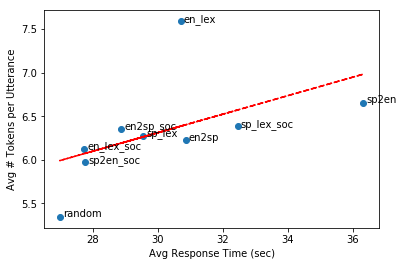


********************

**********
1
**********
WITH SELECT
bot strat	# dialogues	% dial CM from user	avg utts	avg tokens	% CM utt	avg RT
average  	306	0.72	6.19	5.98	0.41	23.36
en2sp    	42	0.74	6.90	6.27	0.40	23.52
en2sp_soc	30	0.73	5.70	5.80	0.36	22.50
en_lex   	36	0.69	5.25	6.14	0.41	27.28
en_lex_soc	28	0.75	6.39	5.93	0.45	24.70
random   	38	0.55	6.05	5.28	0.39	18.45
sp2en    	40	0.72	6.67	6.27	0.35	26.08
sp2en_soc	25	0.76	6.56	6.32	0.42	25.63
sp_lex   	33	0.76	5.88	6.44	0.53	24.67
sp_lex_soc	34	0.79	6.21	5.38	0.44	17.42

********************

	rt_numtok	0.8737	0.0021
y=0.108120x+(3.453719)


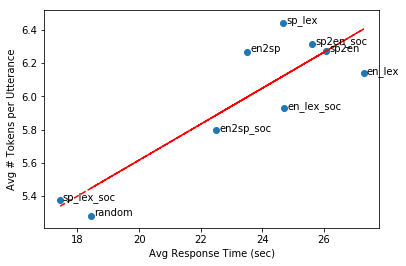


********************



In [148]:
# compare visualizations of styles between Success = 0 or 1
# intersect success2chat and style2chat chat_id lists
reload(cc)
for outcome, out_chat_list in success2chat.iteritems():
    print '*'*10
    print outcome
    print '*'*10
    out_data = {}
    for style, style_chat_list in fix_style2chat_dict.iteritems():
#         print '*'*10
#         print style
#         print '*'*10
        chat_list = [chat_id for chat_id in out_chat_list if chat_id in style_chat_list]
        if not chat_list:
            print 'OH NO'
        out_data[style] = cc.get_general_cm_metrics(fix_data, param_chat_list=chat_list)
        
    cc.viz_general(out_data)
#     cc.viz_cm_style(out_data)

In [ ]:
# Which CM strategies result in better Success?
# toggle first_only variable (repeat workers may have better Success independent of BOT)

first_only = True
out_data = {}
for outcome, out_chat_list in success2chat.iteritems():
#     print '*'*10
#     print outcome
#     print '*'*10
    for chat_id in out_chat_list:
        if chat_id not in orig_data:
            print 'oh no'
            continue
            
        # filter: only use first-time chats
        if first_only:
            if chat_id not in first_chatids:
                continue
            
        bot_style = orig_data[chat_id]['style']
        if bot_style not in out_data:
            out_data[bot_style] = defaultdict(int)
        out_data[bot_style][outcome] += 1
        
zeros = sum([out_data[style][0] for style in out_data])
ones = sum([out_data[style][1] for style in out_data])
success_rate = float(ones) / (zeros + ones)
print '{}\t{}\t{}\t{:.2f}'.format('TOTAL'.ljust(10), zeros, ones, success_rate)
        
for style in sorted(out_data.keys()):
    zero = out_data[style][0]
    one = out_data[style][1]
    success_rate = float(one) / (zero + one)
    print '{}\t{}\t{}\t{:.2f}'.format(style.ljust(10), zero, one, success_rate)

# Remove dialogues of < 3 utterances
Doesn't seem to do much...

In [ ]:
greaterthan2chat = []
ctr = 0
short = 0
for chat_id, chat_dict in orig_data.iteritems():
    try:
        outcome = len(chat_dict['lbl_dict'])
        if outcome > 4:
            greaterthan2chat.append(chat_id)
        else:
            short += 1
    except:
        ctr += 1
   
print '[neither]:', ctr
print 'Short\t{}'.format(short)
print 'Long\t{}'.format(len(greaterthan2chat))

In [ ]:
# visualize for "longer" chats

long_data = {}
for style, style_chat_list in style2chat_dict.iteritems():
    chat_list = [chat_id for chat_id in greaterthan2chat if chat_id in style_chat_list]
    if not chat_list:
        print 'OH NO'
    long_data[style] = cc.get_general_cm_metrics(chat_list, orig_data)

cc.viz_general(long_data)
cc.viz_cm_style(long_data, is_social=False)
cc.viz_cm_style(long_data, is_social=True)

# Examine across reported Gender

* women speak avg 1 more utt per dialogue than men
* similar proportion of dialogues w/ CM, % CM utterances
* women have slightly higher m-idx, slightly lower i-idx
* ratio of women is ~ 40% 

In [ ]:
# create dict where key=0/1, value is chat_list

gender2chat = defaultdict(list)
ctr = 0
for chat_id, chat_dict in orig_data.iteritems():
    # FIRST ONLY
    if chat_id not in first_chatids:
        continue
    try:
        outcome = chat_dict['n00_gender']
    except:
        ctr += 1
        continue
        
    gender2chat[outcome].append(chat_id)
    
print '[neither]:', ctr
for outcome, chat_list in gender2chat.iteritems():
    print '{}\t{}'.format(outcome, len(chat_list))

In [ ]:
# compare visualizations of styles between Success = 0 or 1
# intersect success2chat and style2chat chat_id lists

for outcome, out_chat_list in gender2chat.iteritems():
    if outcome == 'o':
        continue
    print '*'*10
    print outcome
    print '*'*10
    out_data = {}
    for style, style_chat_list in style2chat_dict.iteritems():
#         print '*'*10
#         print style
#         print '*'*10
        chat_list = [chat_id for chat_id in out_chat_list if chat_id in style_chat_list]
        if not chat_list:
            print 'OH NO'
            continue
        out_data[style] = cc.get_general_cm_metrics(orig_data, param_chat_list=chat_list)
        
    cc.viz_general(out_data)
    cc.viz_cm_style(out_data)

In [63]:
# print fix_data.keys()[:3]
chatid = 'C_74a07b16feb44f5f8ad7dfdfa502f419'
print fix_data[chatid]['agents']
bot_idx = -1
for idx, agent in fix_data[chatid]['agents'].iteritems():
    if agent == u'rule_bot':
        bot_idx = int(idx)
for action_dict in fix_data[chatid]['events']:
    if action_dict['agent'] == bot_idx and action_dict['action'] == 'message':
        print action_dict['data']

{u'1': u'human', u'0': u'rule_bot'}
que pasa
¿Tienes algún friend al que le guste la photography o un friend que trabaje en el airport ?
¿Tienes algún friend al que le guste la gardening y a quien le guste la morning ?
¿Tiene algún friend trabajando en el car dealership?
¿Tienes algún friend al que le guste la afternoon ?
¿Tienes algún friend al que le guste swimming ?
tengo 2 friends que trabajan en la office de correos
¿Tiene algún friend que trabaje en el museum o un friend al que le gusten los sports ?
tengo 1 friend al que le gusta drawing, 1 friend que trabaja en el courthouse
tengo 1 friend al que le gustan los puzzles
tengo 2 friends que les gusta acting
tengo 1 friend trabajando en el bank
tengo 1 friend que le gusta el crocheting
tengo 1 friend que le gusta writing, 1 friend que trabaja en el zoo
